In [8]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data_train = np.loadtxt("./data/train.csv", delimiter=',')
data_test =np.loadtxt("./data/test.csv", delimiter=',')
print(data_train.shape,data_test.shape)

(379, 14) (127, 13)


In [3]:
def step(data, learning_rate, theta):
    n = data.shape[0]
    m = data.shape[1] - 1  # Number of features

    gradient = np.zeros(m + 1)

    for i in range(n):
        x = data[i, :-1]  # Features
        y = data[i, -1]   # Target

        # Compute the predicted value
        prediction = np.dot(x, theta[:-1]) + theta[-1]

        # Update the gradients
        gradient[:-1] += -2 * x * (y - prediction)
        gradient[-1] += -2 * (y - prediction)

    gradient /= n  # Average the gradients

    # Update the parameters (theta)
    theta -= learning_rate * gradient

    return theta
        

In [4]:
def cost(data, theta):
    n = data.shape[0]
    m = data.shape[1] - 1  # Number of features

    cost_value = 0

    for i in range(n):
        x = data[i, :-1]  # Features
        y = data[i, -1]   # Target

        # Compute the predicted value
        prediction = np.dot(x, theta[:-1]) + theta[-1]

        # Calculate the cost (squared error)
        cost_value += (y - prediction) ** 2

    cost_value /= n

    return cost_value

In [11]:
def gradient_descent(data, learning_rate, iterations):
    m = data.shape[1] - 1  # Number of features
    theta = np.zeros(m + 1)
    costs=[]

    for i in range(iterations):
        theta = step(data, learning_rate, theta)
        current_cost = cost(data, theta)
        costs.append(current_cost)
        # print(f"Iteration {i}, Cost {cost(data, theta)}")

    plt.plot(range(1, iterations + 1), costs, marker='o')
    plt.xlabel('Iteration')
    plt.ylabel('Cost (Mean Squared Error)')
    plt.title('Gradient Descent: Cost vs. Iteration')
    plt.show()
    
    return theta

In [12]:
def run(data):
    learning_rate = 0.1
    iterations = 200
    #for this training dataset, this is the optimal rate at which i get the coefficients
    theta = gradient_descent(data, learning_rate, iterations)
    return theta

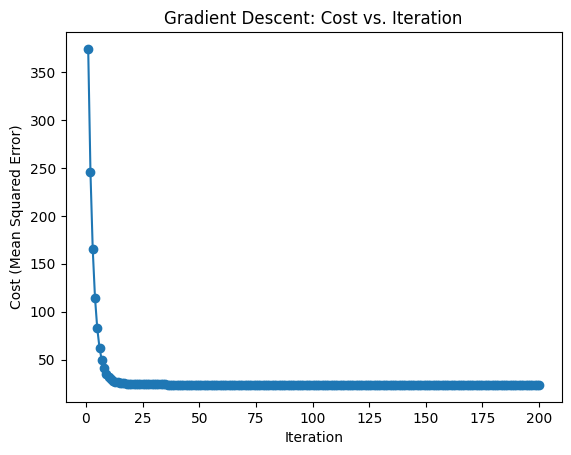

In [13]:
theta = run(data_train)
#add a ones column to the end of test data to account for the constant
ones_column = np.ones((data_test.shape[0], 1))
data_with_ones = np.hstack(( data_test,ones_column))
y_predicted = np.dot(data_with_ones,theta)
np.savetxt("./data/y_predicted.csv", y_predicted, delimiter=',', fmt='%.8f')